In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ratings_df = pd.read_csv('ml-25m/ratings.csv')

In [5]:
# 计算总评分数
total_ratings = len(ratings_df)

# 计算每部电影的平均评分，并找出平均评分最高的5部电影
average_ratings = ratings_df.groupby('movieId')['rating'].mean()
top_5_movies = average_ratings.nlargest(5)

total_ratings, top_5_movies


(25000095,
 movieId
 27914    5.0
 31945    5.0
 83161    5.0
 86975    5.0
 92783    5.0
 Name: rating, dtype: float64)

In [6]:
rating_counts = ratings_df['rating'].value_counts()
active_users = ratings_df['userId'].value_counts().head(10)

评分分布可视化：

创建一个条形图来显示不同评分的频率。

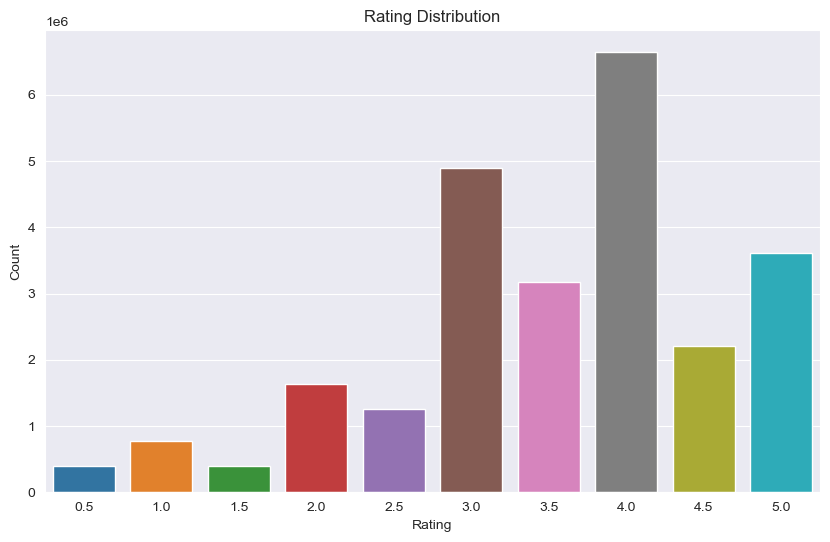

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


最活跃用户可视化：

创建一个条形图来展示评分次数最多的用户。

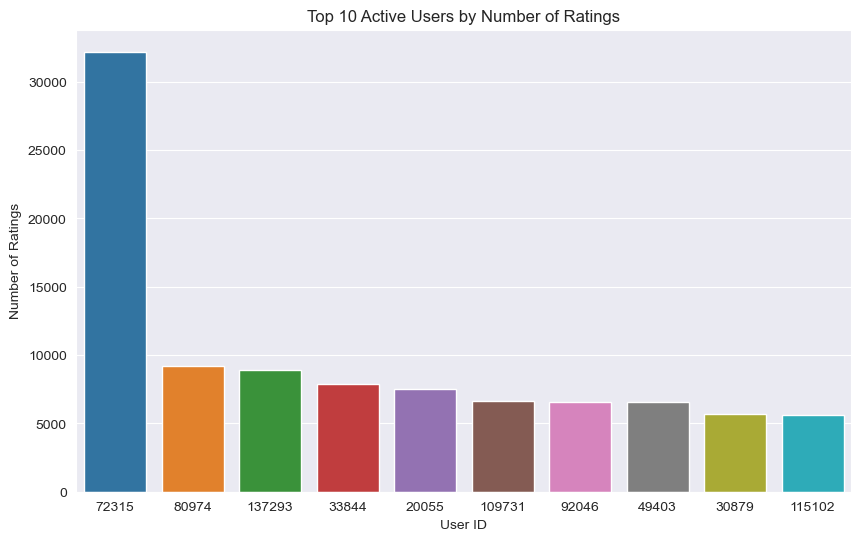

In [8]:
# 创建条形图，按照评分次数排序
plt.figure(figsize=(10, 6))
sns.barplot(x=active_users.index, y=active_users.values, order=active_users.index)
plt.title('Top 10 Active Users by Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()


用户评分习惯分析
分析用户给出的评分分布，了解不同用户的评分习惯是否有显著差异。

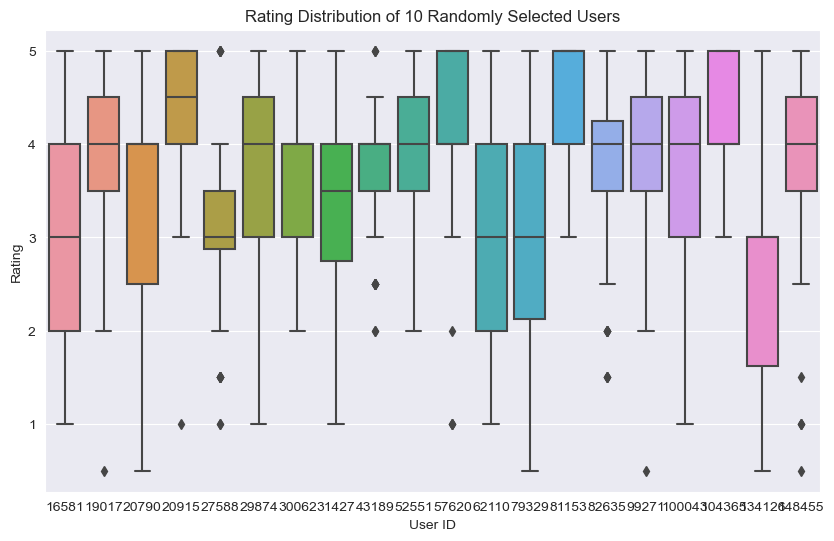

In [9]:
# 随机选择20名用户
sample_users = np.random.choice(ratings_df['userId'].unique(), 20, replace=False)

# 获取这些用户的评分数据
sample_ratings = ratings_df[ratings_df['userId'].isin(sample_users)]

# 创建箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='userId', y='rating', data=sample_ratings)
plt.title('Rating Distribution of 10 Randomly Selected Users')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.show()


评分随时间的变化：

分析评分随时间的变化趋势。例如，您可以将时间戳转换为日期，并查看评分是否随着时间的推移而发生变化。

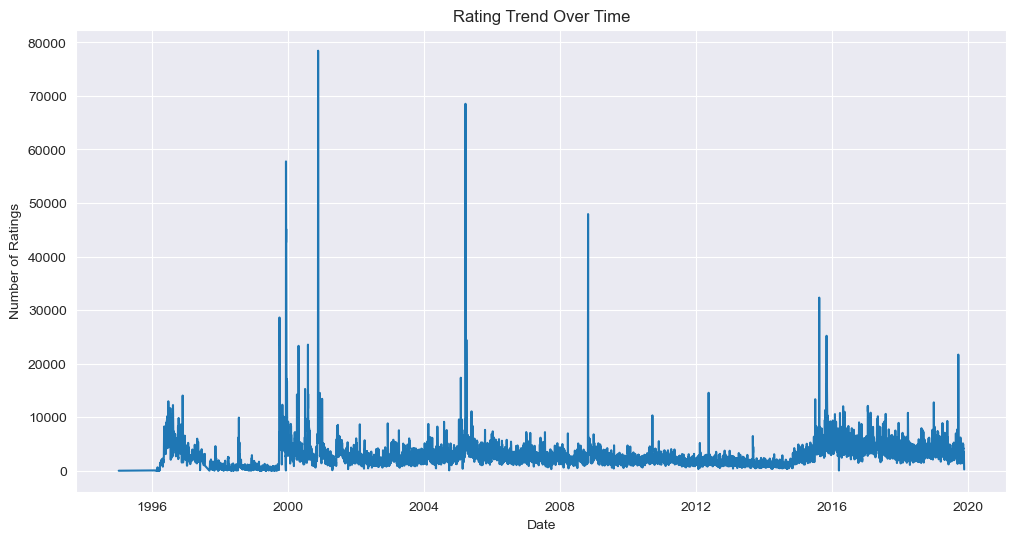

In [10]:
# 将时间戳转换为日期
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# 绘制时间序列图
plt.figure(figsize=(12, 6))
ratings_df.groupby(ratings_df['date'].dt.date)['rating'].count().plot(kind='line')
plt.title('Rating Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.show()


电影流行度分析：

分析哪些电影收到的评分次数最多，这可以作为电影流行度的一个指标。

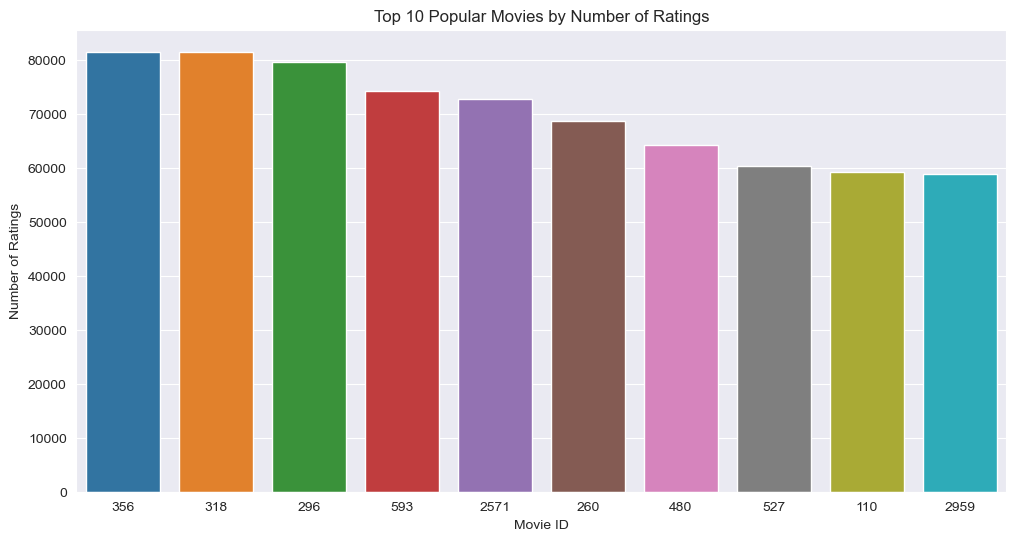

In [11]:
# 计算每部电影的评分次数
movie_popularity = ratings_df['movieId'].value_counts().head(10)

# 绘制电影流行度条形图
plt.figure(figsize=(12, 6))
sns.barplot(x=movie_popularity.index, y=movie_popularity.values, order=movie_popularity.index)
plt.title('Top 10 Popular Movies by Number of Ratings')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.show()


评分与时间的关系：

查看是否存在特定时间段内评分活动更为活跃的趋势，例如在周末或特定季节。

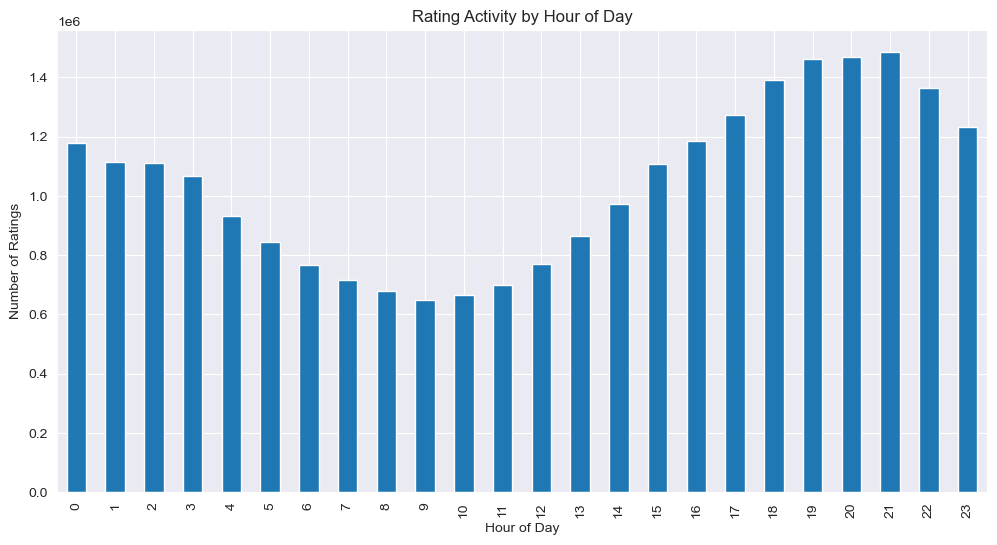

In [12]:
# 创建评分在一天中的分布图
plt.figure(figsize=(12, 6))
ratings_df.groupby(ratings_df['date'].dt.hour)['rating'].count().plot(kind='bar')
plt.title('Rating Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Ratings')
plt.show()


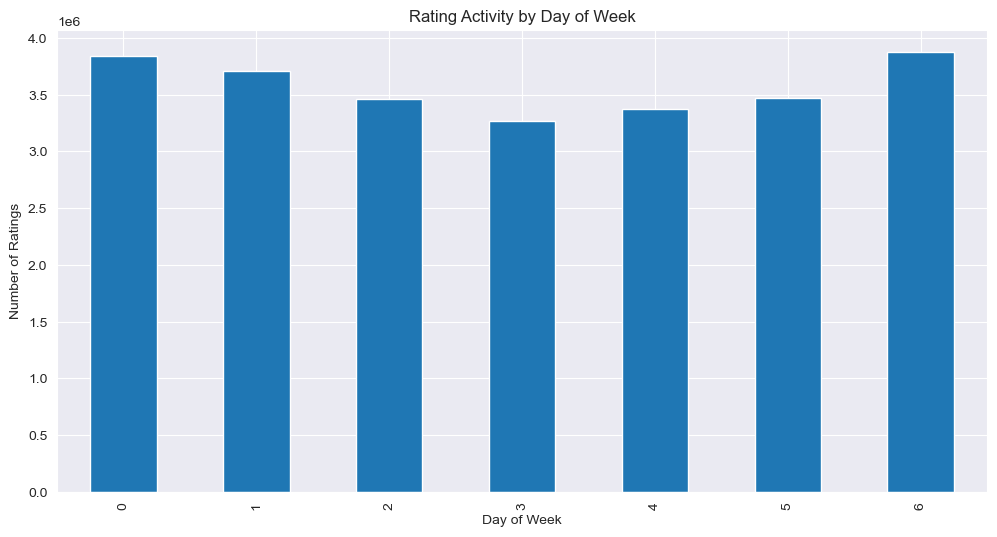

In [13]:
# 创建评分在一周中的分布图
plt.figure(figsize=(12, 6))
ratings_df.groupby(ratings_df['date'].dt.dayofweek)['rating'].count().plot(kind='bar')
plt.title('Rating Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Ratings')
plt.show()

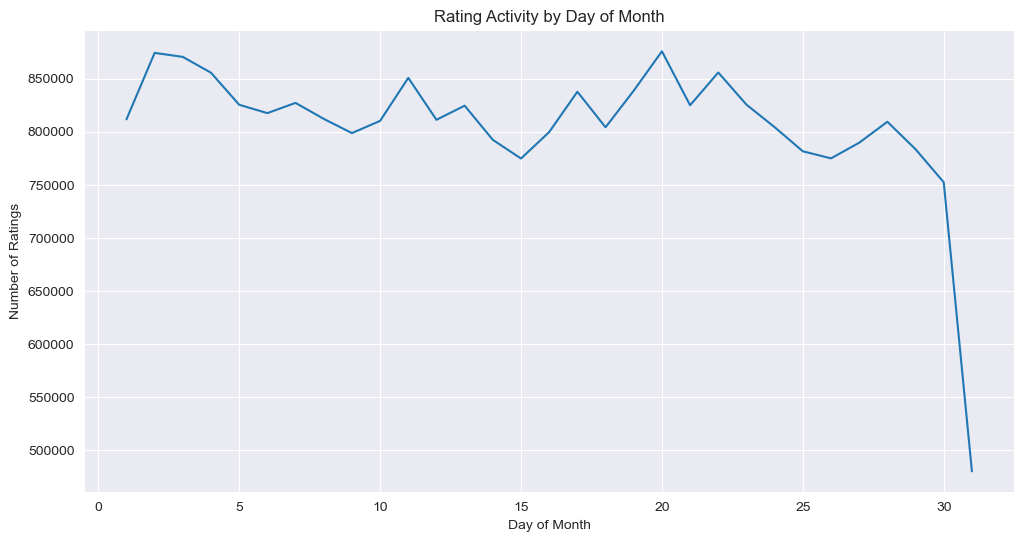

In [14]:
# 创建评分在一月中的分布图
plt.figure(figsize=(12, 6))
ratings_df.groupby(ratings_df['date'].dt.day)['rating'].count().plot(kind='line')
plt.title('Rating Activity by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Ratings')
plt.show()

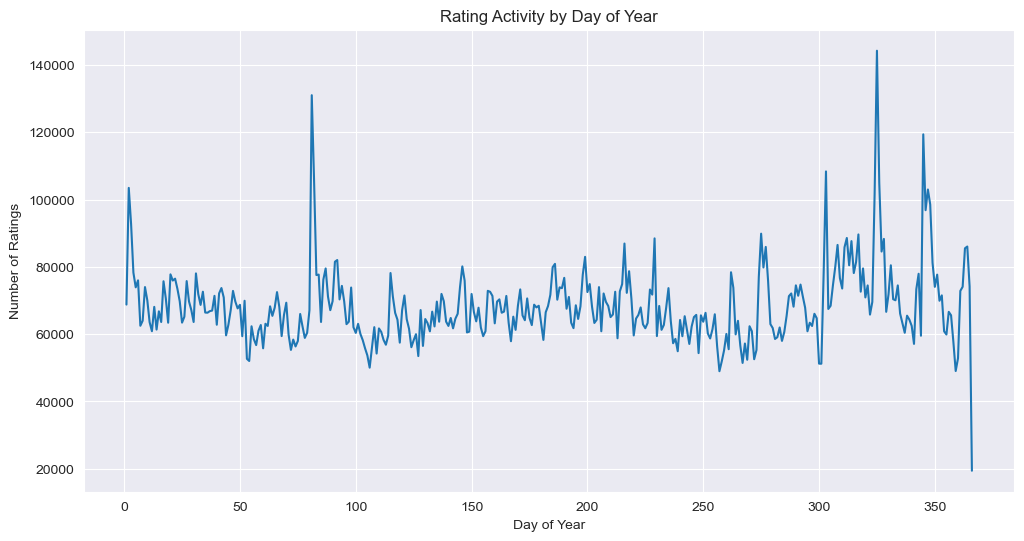

In [15]:
# 创建评分在一年中的分布图
plt.figure(figsize=(12, 6))
ratings_df.groupby(ratings_df['date'].dt.dayofyear)['rating'].count().plot(kind='line')
plt.title('Rating Activity by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Number of Ratings')
plt.show()

评分分布可视化
展示整体评分的分布情况，可以帮助理解用户的评分倾向。

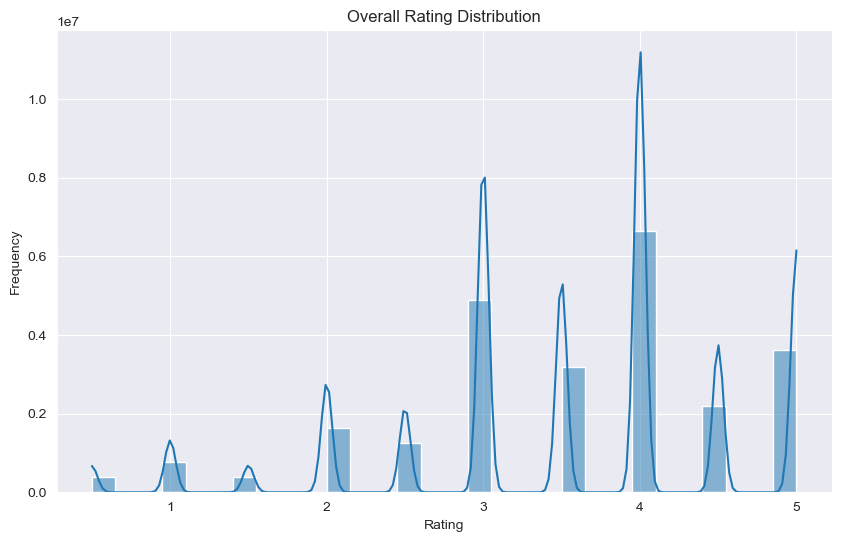

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=30, kde=True)
plt.title('Overall Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

用户评分习惯分析
分析用户给出的评分分布，了解不同用户的评分习惯是否有显著差异。

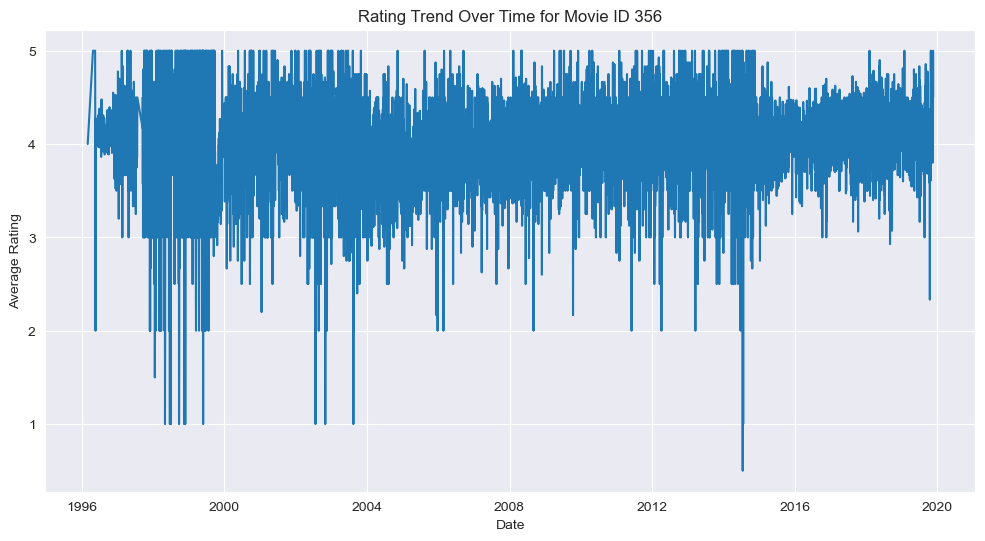

In [17]:
# 选择一个电影
selected_movie = ratings_df['movieId'].value_counts().idxmax()

# 筛选出该电影的评分
movie_ratings = ratings_df[ratings_df['movieId'] == selected_movie]

plt.figure(figsize=(12, 6))
movie_ratings.groupby(movie_ratings['date'].dt.date)['rating'].mean().plot(kind='line')
plt.title(f'Rating Trend Over Time for Movie ID {selected_movie}')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()


用户活跃度随时间的变化
分析用户评分活动随时间的变化，了解评分活动是否存在季节性或特定时间段的活跃度变化。

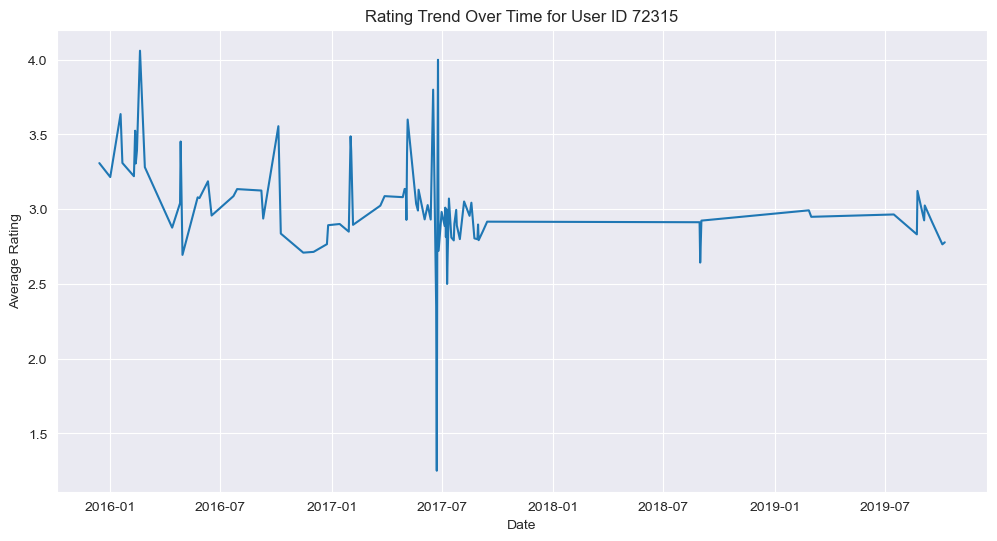

In [18]:
# 选择一个用户
selected_user = ratings_df['userId'].value_counts().idxmax()

# 筛选出该用户的评分
user_ratings = ratings_df[ratings_df['userId'] == selected_user]

plt.figure(figsize=(12, 6))
user_ratings.groupby(user_ratings['date'].dt.date)['rating'].mean().plot(kind='line')
plt.title(f'Rating Trend Over Time for User ID {selected_user}')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

用户评分次数的累积分布函数 (CDF)
了解大多数用户的评分行为，比如多少比例的用户评分超过了特定的次数。

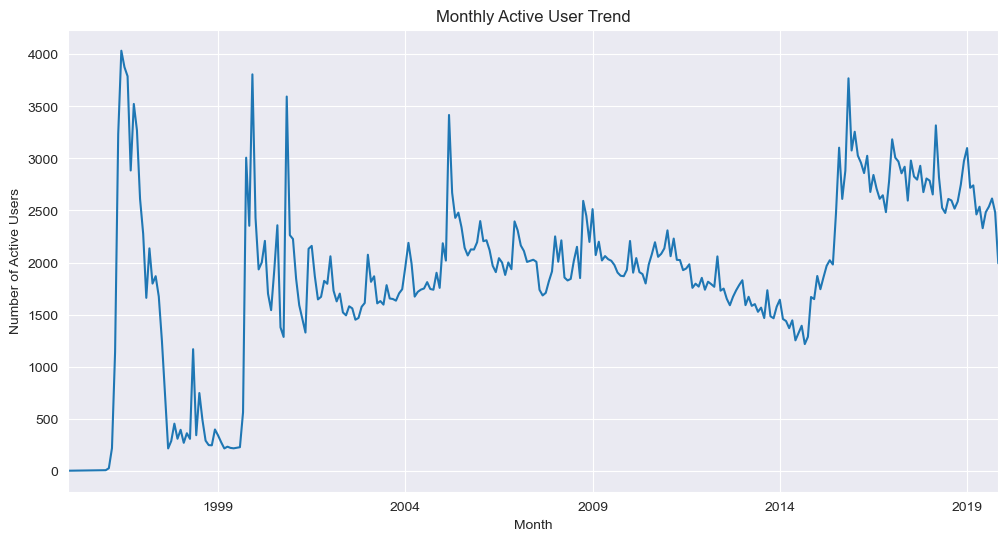

In [19]:
plt.figure(figsize=(12, 6))
ratings_df.groupby(ratings_df['date'].dt.to_period("M"))['userId'].nunique().plot(kind='line')
plt.title('Monthly Active User Trend')
plt.xlabel('Month')
plt.ylabel('Number of Active Users')
plt.show()

评分密度图
展示评分密度，理解评分在数据集中的分布情况。

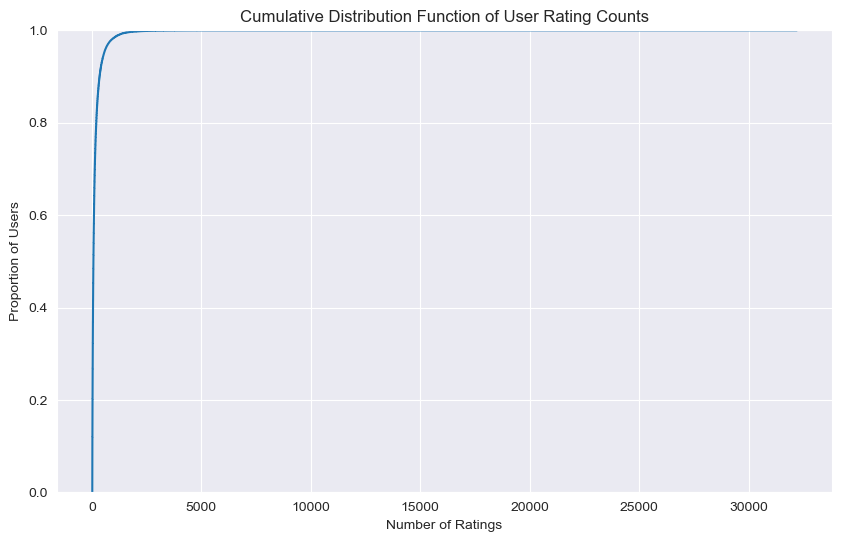

In [20]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(ratings_df['userId'].value_counts())
plt.title('Cumulative Distribution Function of User Rating Counts')
plt.xlabel('Number of Ratings')
plt.ylabel('Proportion of Users')
plt.show()


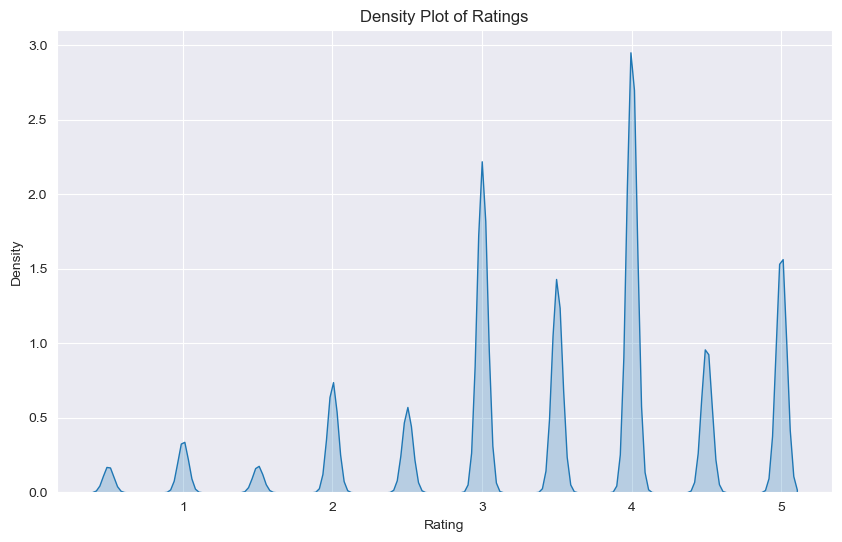

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(ratings_df['rating'], fill=True)
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


电影评分随用户评分次数的变化
分析那些评分次数较多的用户是否对电影的评分趋势有所不同。

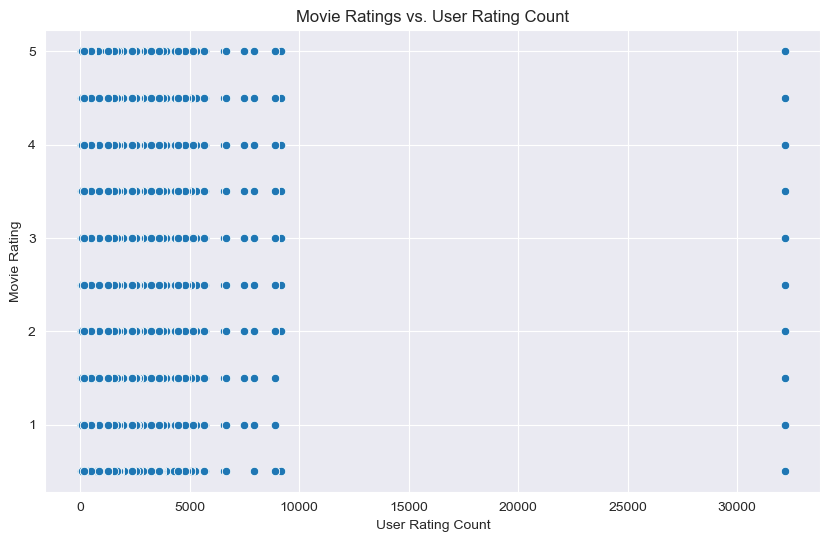

In [22]:
# 创建用户评分次数的列
ratings_df['user_rating_count'] = ratings_df.groupby('userId')['userId'].transform('count')

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_rating_count', y='rating', data=ratings_df)
plt.title('Movie Ratings vs. User Rating Count')
plt.xlabel('User Rating Count')
plt.ylabel('Movie Rating')
plt.show()


用户评分的时间分布
分析用户是否在特定时间（比如晚上或周末）更倾向于评分。

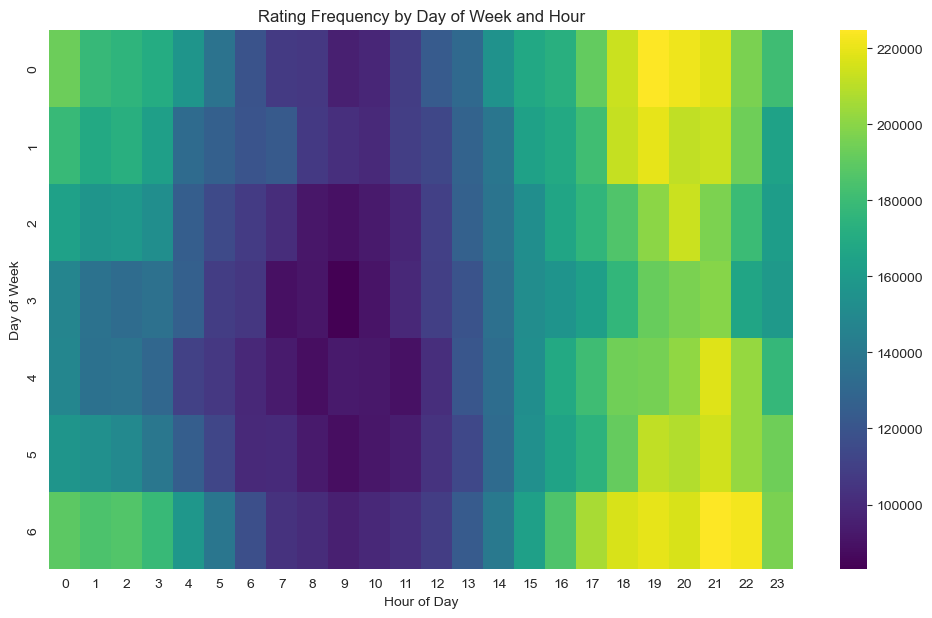

In [23]:
# 将时间戳转换为小时和星期
ratings_df['hour'] = ratings_df['date'].dt.hour
ratings_df['day_of_week'] = ratings_df['date'].dt.dayofweek

# 创建热力图数据
heatmap_data = ratings_df.groupby(['day_of_week', 'hour']).size().unstack()

# 绘制热力图
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Rating Frequency by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


电影评分与时间戳之间的关系
探索评分是否随着时间戳的变化而变化，可能反映出不同时间段电影的流行趋势。

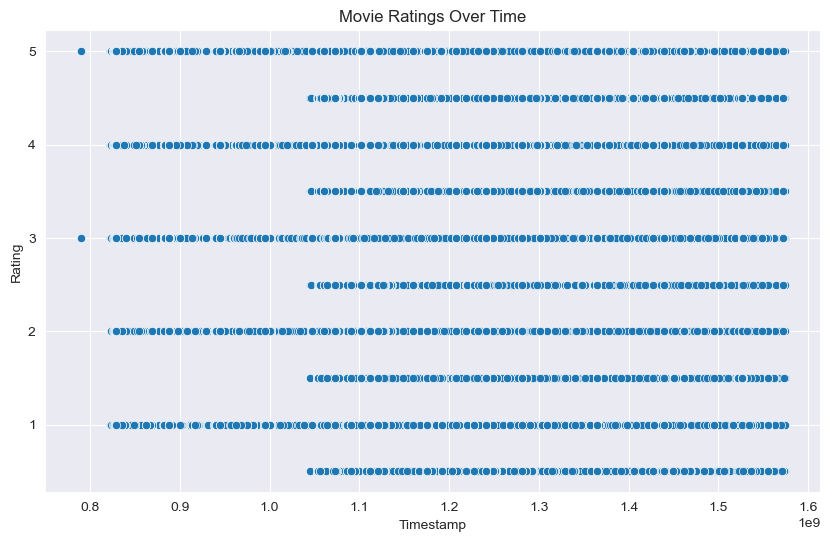

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='timestamp', y='rating', data=ratings_df)
plt.title('Movie Ratings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.show()

时间与评分的热力图
分析一天中不同时间或一周中不同日子的评分模式。

评分密度热力图
查看评分在不同的评分区间和电影之间的分布。

用户活跃度与电影流行度的热力图
分析哪些电影受到活跃用户的青睐。

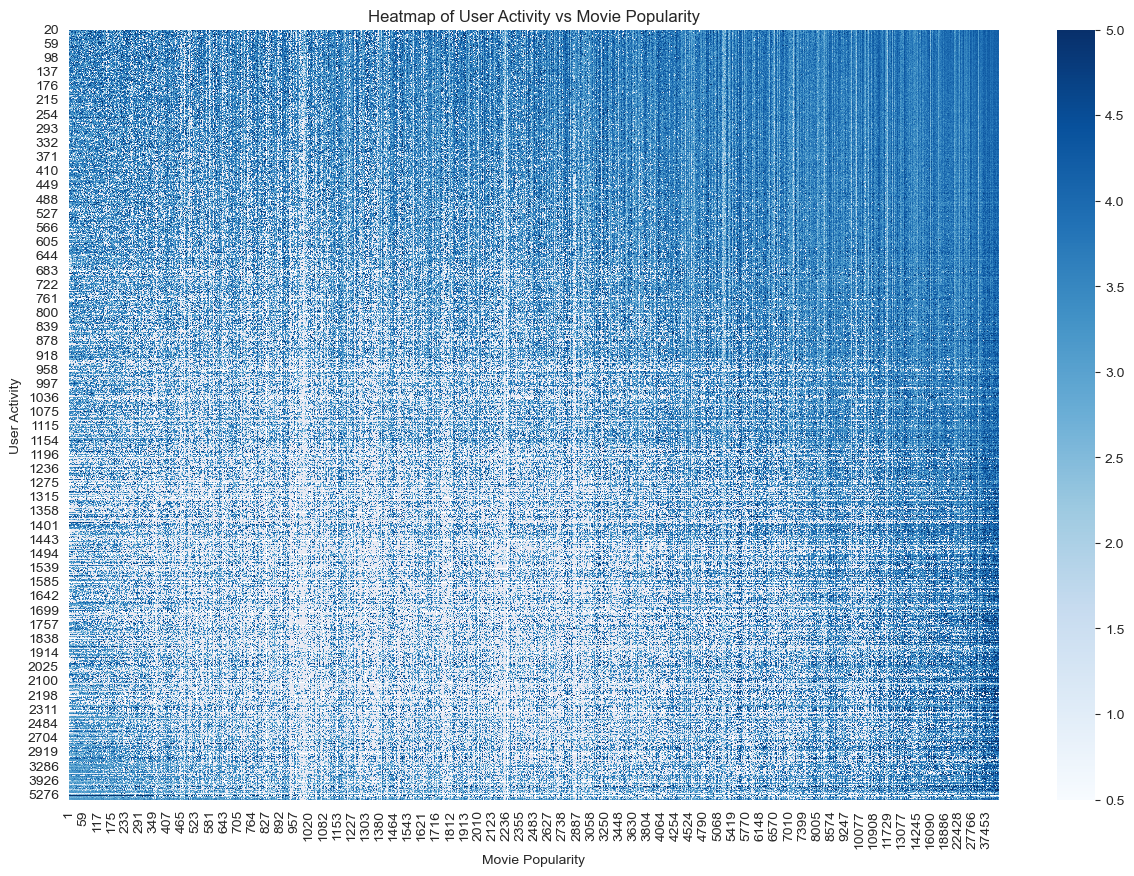

In [27]:
# 创建用户活跃度和电影流行度的列
ratings_df['user_activity'] = ratings_df.groupby('userId')['userId'].transform('count')
ratings_df['movie_popularity'] = ratings_df.groupby('movieId')['movieId'].transform('count')

# 创建热力图数据
heatmap_data = ratings_df.pivot_table(index='user_activity', columns='movie_popularity', values='rating')

# 绘制热力图
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Heatmap of User Activity vs Movie Popularity')
plt.xlabel('Movie Popularity')
plt.ylabel('User Activity')
plt.show()
